In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv("/content/indian_food.csv")

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255 entries, 0 to 254
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   name            255 non-null    object
 1   ingredients     255 non-null    object
 2   diet            255 non-null    object
 3   prep_time       255 non-null    int64 
 4   cook_time       255 non-null    int64 
 5   flavor_profile  255 non-null    object
 6   course          255 non-null    object
 7   state           255 non-null    object
 8   region          254 non-null    object
dtypes: int64(2), object(7)
memory usage: 18.1+ KB


In [ ]:
data.head()

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
0,Balu shahi,"Maida flour, yogurt, oil, sugar",vegetarian,45,25,sweet,dessert,West Bengal,East
1,Boondi,"Gram flour, ghee, sugar",vegetarian,80,30,sweet,dessert,Rajasthan,West
2,Gajar ka halwa,"Carrots, milk, sugar, ghee, cashews, raisins",vegetarian,15,60,sweet,dessert,Punjab,North
3,Ghevar,"Flour, ghee, kewra, milk, clarified butter, su...",vegetarian,15,30,sweet,dessert,Rajasthan,West
4,Gulab jamun,"Milk powder, plain flour, baking powder, ghee,...",vegetarian,15,40,sweet,dessert,West Bengal,East


In [ ]:
missing_values = data.isnull().sum()
print(missing_values)

name              0
ingredients       0
diet              0
prep_time         0
cook_time         0
flavor_profile    0
course            0
state             0
region            1
dtype: int64


In [ ]:
data.replace(-1, pd.NA, inplace=True)

data['flavor_profile'] = data['flavor_profile'].fillna(data['flavor_profile'].mode()[0])

In [ ]:
flavor_counts = data['flavor_profile'].value_counts()

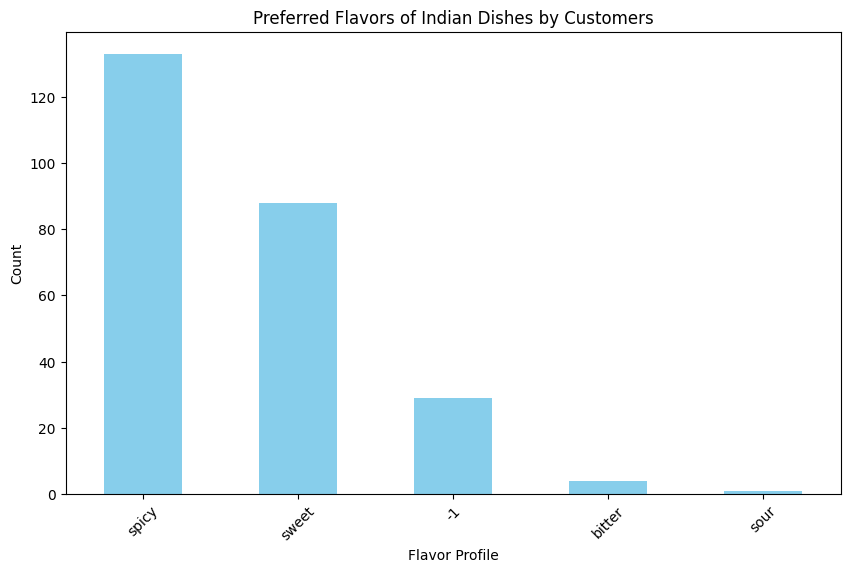

In [ ]:
# Visualize the preferred flavors of Indian dishes by customers using a Bar chart

plt.figure(figsize=(10, 6))
flavor_counts.plot(kind='bar', color='skyblue')
plt.title('Preferred Flavors of Indian Dishes by Customers')
plt.xlabel('Flavor Profile')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

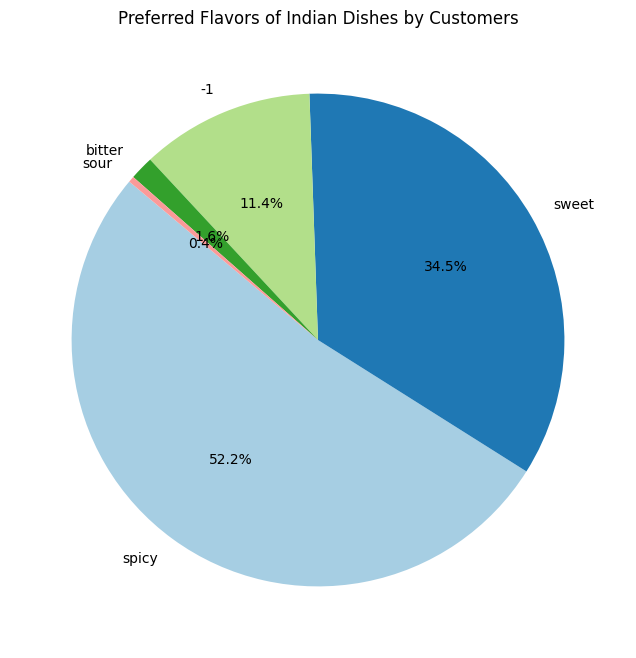

In [ ]:
# Visualize the preferred flavors of Indian dishes by customers using a Pie chart
plt.figure(figsize=(8, 8))
flavor_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Preferred Flavors of Indian Dishes by Customers')
plt.ylabel('')
plt.show()

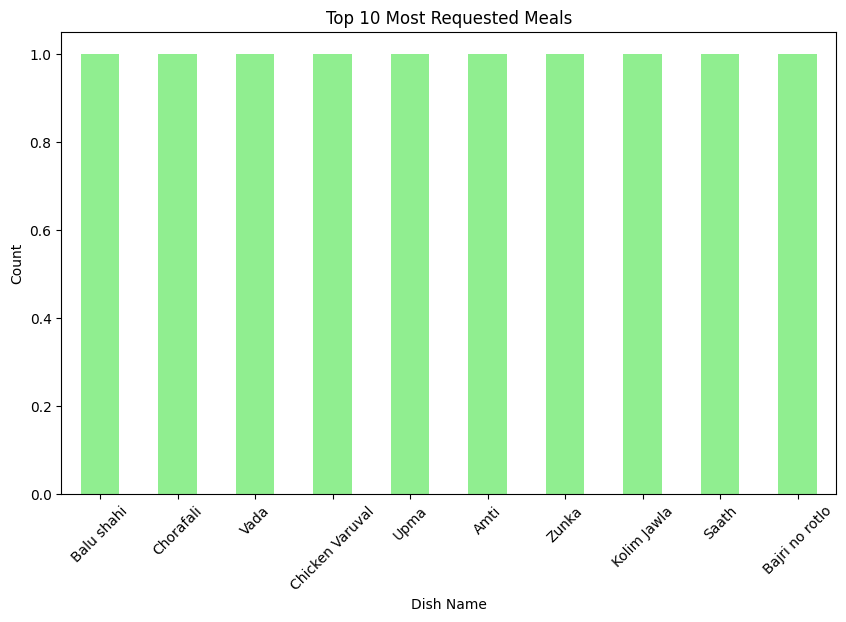

In [ ]:
# Visualize the top 10 most requested meals
top_10_dishes = data['name'].value_counts().head(10)

plt.figure(figsize=(10, 6))
top_10_dishes.plot(kind='bar', color='lightgreen')
plt.title('Top 10 Most Requested Meals')
plt.xlabel('Dish Name')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

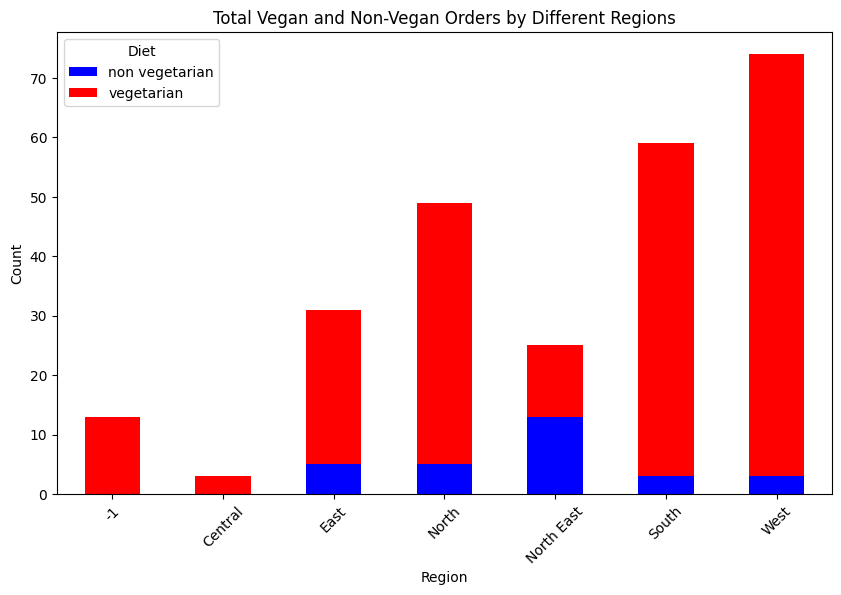

In [ ]:
# Visualize the total vegan and non-vegan orders by different regions
diet_region_counts = data.groupby(['region', 'diet']).size().unstack()

diet_region_counts.plot(kind='bar', stacked=True, figsize=(10, 6), color=['Blue','Red'])
plt.title('Total Vegan and Non-Vegan Orders by Different Regions')
plt.xlabel('Region')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Diet')
plt.show()